In [7]:
import pandas as pd
import os
import glob
import numpy as np
import statistics as stats
import scipy
import src.mpra_tools.predicted_occupancy as po
import src.mpra_tools.fasta_utils as fu
import math
import matplotlib.pyplot as plt
from collections import Counter, defaultdict
import random
from src.mpra_tools.fasta_utils import write_fasta

In [9]:

f1_metrics = ['micro','macro','weighted']
folder = 'bayes_10542843'


In [64]:
# Import standard CLF performance metrics
Clf_performance = pd.read_csv("Data/cnn_dataset_performance_metrics.txt", sep ='\t', index_col=[0,1])
clf_test = Clf_performance[Clf_performance['test_set']=='test_set'][f1_metrics].groupby(level=0).agg('max')
clf_ret = Clf_performance[Clf_performance['test_set']=='test_retinopathy'][f1_metrics].groupby(level=0).agg('max')

bayes_test = pd.read_csv('bayes_10542843/test_metrics.csv', index_col=0)

bayes_ret = pd.read_csv('bayes_10542843/retinopathy_test_metrics.csv', index_col=0)

combined_test = pd.concat([
    clf_test,
    pd.DataFrame(bayes_test.values.T, index=['NaiveBayes'], columns=f1_metrics)
])

combined_ret = pd.concat([
    clf_ret,
    pd.DataFrame(bayes_ret.values.T, index=['NaiveBayes'], columns=f1_metrics)
])

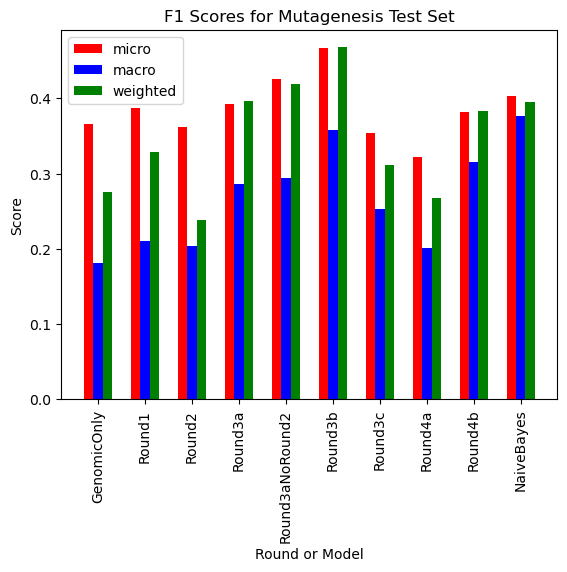

In [71]:
# Test Set
df = combined_test

plt.bar(x=np.arange(len(df))-0.2,
        height=df['micro'],
        width=0.2,
        color='r',
        label='micro'
        )
plt.bar(x=np.arange(len(df)),
        height=df['macro'],
        width=0.2,
        color='b',
        label='macro'
        )
plt.bar(x=np.arange(len(df))+0.2,
        height=df['weighted'],
        width=0.2,
        color='g',
        label='weighted'
        )


plt.xticks(np.arange(len(df)),df.index,rotation=90)
plt.title("F1 Scores for Mutagenesis Test Set")
plt.ylabel("Score")
plt.xlabel("Round or Model")

plt.legend()
    
plt.show()    

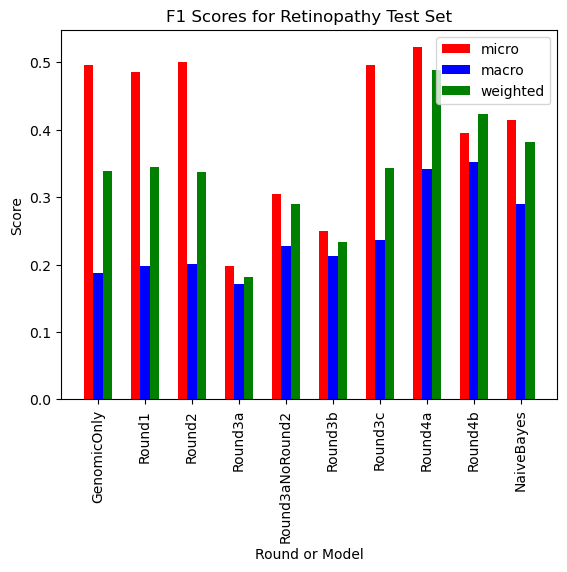

In [72]:
# Test Set
df = combined_ret

plt.bar(x=np.arange(len(df))-0.2,
        height=df['micro'],
        width=0.2,
        color='r',
        label='micro'
        )
plt.bar(x=np.arange(len(df)),
        height=df['macro'],
        width=0.2,
        color='b',
        label='macro'
        )
plt.bar(x=np.arange(len(df))+0.2,
        height=df['weighted'],
        width=0.2,
        color='g',
        label='weighted'
        )


plt.xticks(np.arange(len(df)),df.index,rotation=90)

plt.title("F1 Scores for Retinopathy Test Set")
plt.ylabel("Score")
plt.xlabel("Round or Model")

plt.legend()
    
plt.show()    